# **Sentiment Analysis on Hotel Reviews**



**Gathering data**

In [ ]:
# Kaggle link
# https://www.kaggle.com/anu0012/hotel-review/data

In [ ]:
import pandas as pd 
review = pd.read_csv('/content/drive/MyDrive/Major Project/train.csv')
review.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [ ]:
review.shape

(38932, 5)

**Bar graph** 

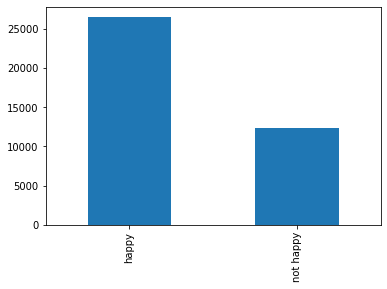

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
review.Is_Response.value_counts().plot(kind='bar')
plt.show()

**Removing unnecessary columns**

In [ ]:
review.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

**Data Cleaning**

In [ ]:
import re
import string
def dataCleaning(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

**Updating the dataframe**

In [ ]:
review['Description'] = pd.DataFrame(review.Description.apply(lambda x: dataCleaning(x)))
review.head(10)

,Description,Is_Response
0,the room was kind of clean but had a very stro...,not happy
1,i stayed at the crown plaza april april th...,not happy
2,i booked this hotel through hotwire at the low...,not happy
3,stayed here with husband and sons on the way t...,happy
4,my girlfriends and i stayed here to celebrate ...,not happy
5,we had rooms one was very nice and clearly ha...,happy
6,my husband and i have stayed in this hotel a f...,not happy
7,my wife i stayed in this glorious city a whil...,happy
8,my boyfriend and i stayed at the fairmont on a...,happy
9,wonderful staff great location but it was defi...,not happy


**Splitting data**

In [ ]:
from sklearn.model_selection import train_test_split
X = review.Description
Y = review.Is_Response
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 25)

**Training and testing of the model**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('vectorizer',TfidfVectorizer()),('classifier',LogisticRegression())])
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

**Accuracy score**

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(y_pred, y_test))

Accuracy :  0.8826248876332349


**Confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[5000,  572],
       [ 342, 1873]])

**Plotting the confusion matrix**

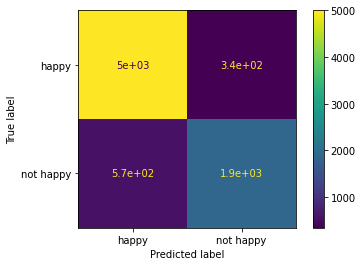

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)

**Classification report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       happy       0.94      0.90      0.92      5572
   not happy       0.77      0.85      0.80      2215

    accuracy                           0.88      7787
   macro avg       0.85      0.87      0.86      7787
weighted avg       0.89      0.88      0.88      7787



**Testing the model**

In [ ]:
example = ["I'm satisfied"]
result = model.predict(example)

print(result)

['happy']


**Save the model**

In [ ]:
import joblib
joblib.dump(model,'sentiment')

['sentiment']

**Installing necessary libraries**

In [ ]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 8.5MB/s 
     |████████████████████████████████| 4.2MB 37.1MB/s 
     |████████████████████████████████| 112kB 45.5MB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
     |████████████████████████████████| 174kB 38.5MB/s 
     |████████████████████████████████| 122kB 48.3MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15985 sha256=87b22a4a38894807cdceb947dc90f538fb14a31609016de88bd3767b026091d8
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


**Writing app.py**

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
model = joblib.load('sentiment')
st.title('Sentiment Analysis')
ip = st.text_input("Enter the review")
op = model.predict([ip])
if st.button('Predict'):
  st.title(op[0])


Writing app.py


**Running app.py**

In [ ]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://9e74533717b1.ngrok.io'